# 3. Exploratory Data Analysis - Song Lyrics

# Standard Imports

In [31]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import re

# bs4, nltk, and sklearn imports
from bs4 import BeautifulSoup   
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
ordered_songlist = pd.read_csv('ordered_songlist.csv')
ordered_songlist.head()

,index,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity,lyrics
0,0,24kGoldn,Mood (feat. Iann Dior),Mood (feat. Iann Dior),3tjFYV6RSFtuktYl3ZtYcq,0.700,0.722,7,-3.558,0,0.0369,0.000000,0.2720,0.756,90.989,140526,4,0.221,100.0,kgoldn kgoldn always mood fuckin round actin b...
1,1,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.746,0.690,11,-7.956,1,0.1640,0.000000,0.1010,0.497,89.977,181733,4,0.247,96.0,dababy woo woo pull pull pull baby pull pull p...
2,2,Justin Bieber,Holy,Holy (feat. Chance The Rapper),5u1n1kITHCxxp8twBcZxWy,0.673,0.704,6,-8.056,1,0.3600,0.000000,0.0898,0.372,86.919,212093,4,0.196,93.0,justin bieber hear lot sinners saint might riv...
3,3,Ariana Grande,Stuck with U,Stuck with U (with Justin Bieber),4HBZA5flZLE435QTztThqH,0.597,0.450,8,-6.658,1,0.0418,0.000000,0.3820,0.537,178.765,228482,3,0.223,90.0,ariana grande mmm hey fun stuck ariana grande ...
4,4,Pop Smoke,Shoot For The Stars Aim For The Moon,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,0.709,0.548,10,-8.493,1,0.3530,0.000002,0.1330,0.543,83.995,160000,4,0.650,88.0,uh shawty jogging every morning every morning ...


# Genius Lyrics - Most Common Words

In [42]:
ordered_songlist.dropna(subset=['lyrics'],inplace=True)

In [43]:
X = ordered_songlist['lyrics']

In [44]:
# Split the data into the training and testing sets.
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

In [45]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [46]:
X_train_tf = tvec.fit_transform(X_train)

In [47]:
wordcount_df = pd.DataFrame(X_train_tf.toarray(), columns=tvec.get_feature_names())
wordcount_df.head()

,aa,aaaaahhhhhhhhh,aaaahhahhhhaaaaa,aaaaiiiggggghhhhh,aaahhh,aaahhhhaaaaahaaaa,aaaiiiggggghhhhhhhh,aaaiiigggghhhhh,aaayy,aah,...,zunn,zuppose,zurich,zwei,zwilling,zwizzyland,zy,zynga,zz,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# get count of top-occurring words
top_words_tf = {}
for i in wordcount_df.columns:
    top_words_tf[i] =  wordcount_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

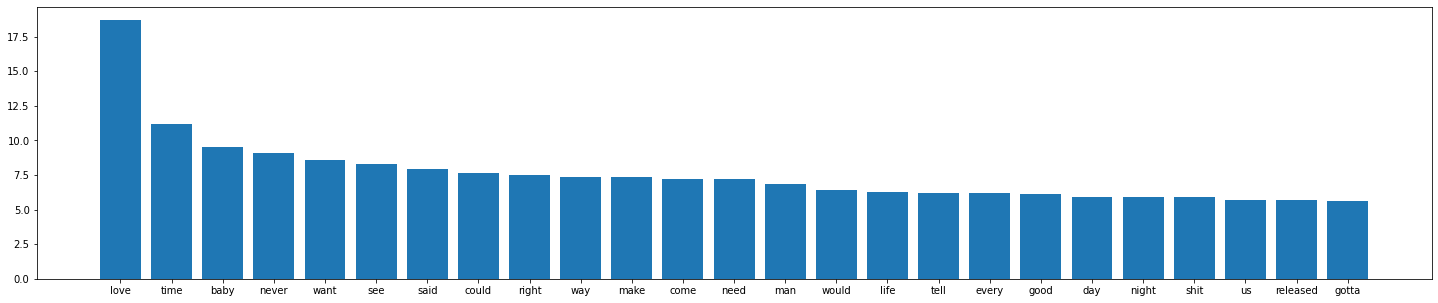

In [49]:
plt.figure(figsize = (25, 5))

# visualize top 10 words
plt.bar(most_freq_tf[0][:25], most_freq_tf[1][:25]);

# Genius Lyrics - Sentiment Analysis

## Sentiment Analysis - Love vs. Heartbreak

In [50]:
# Let's come up with a list of positive and negative words we might observe.
love_words = ['love', 'loved', 'sexy', 'sex', 'baby', 'shawty', 'girl', 'boy', 'guy', 'date', 'kiss', 'good', 'great', 'together', 'bed', 'wish', 'home', 'temptation','night ']
heartbreak_words = ['cry', 'tears', 'distant', 'crazy', 'shit', 'horrible', 'die', 'cold', 'pain', 'lonely', 'lost', 'fight', 'last', 'scream', 'regret','feels']

In [51]:
def simple_sentiment(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # Splits everything up into words with line breaks and punctuation
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    # Stem our positive/negative words.
    love_stems = [p_stemmer.stem(i) for i in set(love_words)]
    heartbreak_stems = [p_stemmer.stem(i) for i in set(heartbreak_words)]

    # Count "love" words.
    love_count = len([i for i in stemmed_words if i in love_stems])
    
    # Count "heartbreak" words
    heartbreak_count = len([i for i in stemmed_words if i in heartbreak_stems])
    
    # Calculate Sentiment Percentage 
    # (Love Count - Heartbreak Count) / (Total Count)

    return round((love_count - heartbreak_count))/ len(stemmed_words)

In [52]:
# Apply sentiment analysis to every single lyrics set
lyric_sentiments_love = []

# For every set of lyrics in our Dataframe...
for lyrics in ordered_songlist['lyrics']:
    
    try: # Convert lyrics to sentiment, then append to list.
        lyric_sentiments_love.append(simple_sentiment(lyrics))
    
    except:
        lyric_sentiments_love.append(0)

In [53]:
ordered_songlist['lyrics_sentiments_love'] = lyric_sentiments_love

In [54]:
ordered_songlist[['popularity','lyrics_sentiments_love']].head()

,popularity,lyrics_sentiments_love
0,100.0,0.060000
1,96.0,-0.003390
2,93.0,-0.016260
3,90.0,0.011976
4,88.0,0.128205


## Sentiment Analysis - Hype vs. Chill

In [55]:
# Let's come up with a list of positive and negative words we might observe.
hype_words = ['hype','yeah','baby','party','damn','punch','fuck','tonight','livin','living','together','wine','drink','alcohol','buzz','everyone','everybody','lit']
chill_words = ['chill','bed','coffee','make','friend','sleep','rest','alone','space','food','breakfast','lunch','dinner','hang','hangout','hungout']

In [56]:
def simple_sentiment(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+') # Splits everything up into words with line breaks and punctuation
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    # Stem our positive/negative words.
    hype_stems = [p_stemmer.stem(i) for i in set(hype_words)]
    chill_stems = [p_stemmer.stem(i) for i in set(chill_words)]

    # Count "love" words.
    hype_count = len([i for i in stemmed_words if i in hype_stems])
    
    # Count "heartbreak" words
    chill_count = len([i for i in stemmed_words if i in chill_stems])
    
    # Calculate Sentiment Percentage 
    # (Love Count - Heartbreak Count) / (Total Count)

    return round((hype_count - chill_count))/ len(stemmed_words)

In [57]:
simple_sentiment(ordered_songlist['lyrics'][0])

0.035

In [58]:
# Apply sentiment analysis to every single lyrics set
lyric_sentiments_energy = []

# For every set of lyrics in our Dataframe...
for lyrics in ordered_songlist['lyrics']:
    
    try: # Convert lyrics to sentiment, then append to list.
        lyric_sentiments_energy.append(simple_sentiment(lyrics))
    
    except:
        lyric_sentiments_energy.append(0)

In [59]:
ordered_songlist['lyric_sentiments_energy'] = lyric_sentiments_energy

In [60]:
ordered_songlist[['popularity','lyric_sentiments_energy']].head()

,popularity,lyric_sentiments_energy
0,100.0,0.035000
1,96.0,0.016949
2,93.0,-0.004065
3,90.0,0.029940
4,88.0,0.006410


# Lyric Sentiment EDA

In [61]:
song_features = ['danceability','energy','loudness','speechiness',
                 'instrumentalness', 'liveness', 'valence', 'tempo',
                'mode','duration_ms','time_signature','acousticness',
                'lyric_sentiments_love', 'lyric_sentiments_energy']

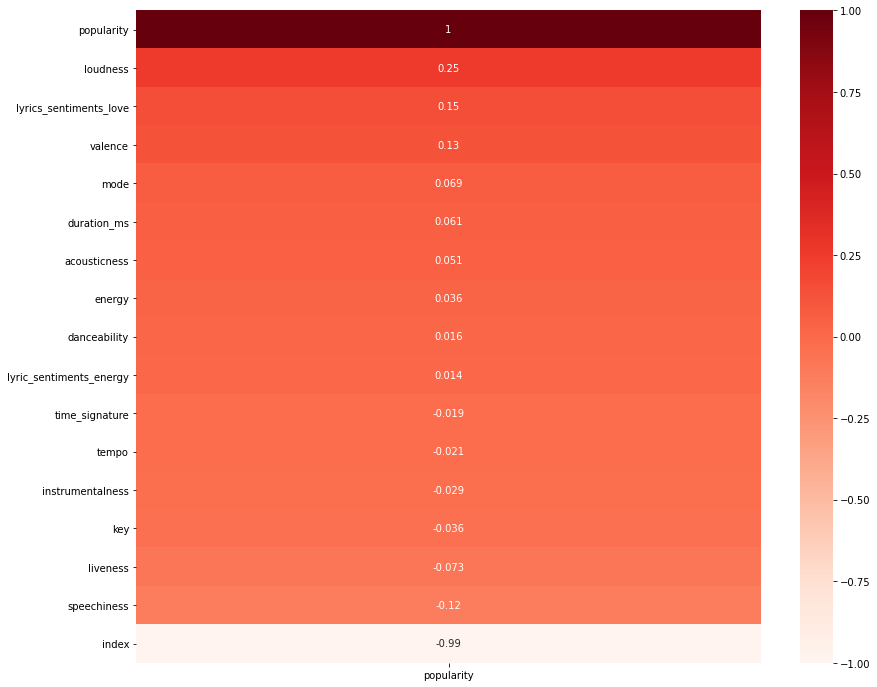

In [62]:
# Heatmap of all features correlation with "popularity"
corr_pop = ordered_songlist.corr()[['popularity']]
plt.figure(figsize=(14,12))
sns.heatmap(corr_pop.sort_values('popularity',ascending=False), cmap="Reds", center=0, annot=True, vmin=-1, vmax=1);

### Go to Part 4. Regression Modeling for more!